In [1]:
#Librerias necesarias
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import statsmodels.api as sm

---
# Inicio
## Cargamos el dataset

In [2]:
#Cargamos el dataset limpio del TP 1
data = pd.read_csv('dataset_caba.csv')
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data.rename(columns={'place_name_normalized':'place', 'property_type':'ptype'}, inplace=True)
data.sample(3)

ptype     price  surface_total_in_m2  surface_covered_in_m2  \
3115  apartment  120000.0                108.0                   58.0   
6343  apartment  169900.0                 85.0                   85.0   
5826  apartment   85000.0                 37.0                   35.0   

      price_usd_per_m2  floor  rooms         place   disposicion  aEstrenar  \
3115       1111.111111    0.0    3.0        Flores        frente          0   
6343       1998.823529    6.0    3.0     Caballito        frente          0   
5826       2297.297297    8.0    2.0  Villa Devoto  contrafrente          0   

      garage  balcon  piscina  sum  patio  lavadero  amenities  parrilla  
3115       0       0        0    0      1         1          0         0  
6343       0       1        0    0      0         0          0         0  
5826       0       1        0    0      1         0          0         0

---
# Modelo
Este modelo utiliza las columnas entregadas en el TP 1 más otras generadas para el TP 2: Garage, balcon, piscina, sum, patio, lavadero, amenities, parrilla.

In [3]:
y_columnas = ['price_usd_per_m2']
x_columnas = ['ptype','floor','rooms', 'place', 'disposicion', 'aEstrenar','garage','balcon','piscina','sum','patio','lavadero','amenities','parrilla']
data_modelo =  pd.concat([data[y_columnas],data[x_columnas]], axis = 1)
data_modelo

price_usd_per_m2      ptype  floor  rooms                place  \
0          1309.090909  apartment    3.0    2.0              Liniers   
1          1812.500000  apartment    2.0    4.0                Boedo   
2          1702.127660  apartment    1.0    5.0            Balvanera   
3          2200.000000  apartment    1.0    3.0            Caballito   
4          3236.363636  apartment   12.0    3.0             Belgrano   
...                ...        ...    ...    ...                  ...   
6397       1857.142857  apartment    2.0    2.0                 Boca   
6398       3461.538462  apartment    4.0    4.0            Caballito   
6399       2650.000000  apartment    1.0    3.0              Palermo   
6400       1826.923077  apartment    1.0    0.0  Villa General Mitre   
6401       2611.464968  apartment    1.0    0.0              Palermo   

       disposicion  aEstrenar  garage  balcon  piscina  sum  patio  lavadero  \
0          lateral          0       0       0        0    0      0         1   
1           frente          0       0       1        0    0      0         0   
2           frente          0       1       1        0    0      1         0   
3     contrafrente          0       0       1        0    0      0         1   
4           frente          0       1       1        0    0      1         1   
...            ...        ...     ...     ...      ...  ...    ...       ...   
6397        frente          0       0       0        0    0      1         1   
6398        frente          0       1       1        0    0      0         1   
6399        frente          0       0       1        1    1      1         1   
6400        frente          0       0       0        0    0      0         0   
6401        frente          0       0       1        0    0      1         1   

      amenities  parrilla  
0             0         0  
1             0         0  
2             1         0  
3             0         0  
4             0         0  
...         ...       ...  
6397          1         0  
6398          0         1  
6399          1         1  
6400          0         0  
6401          0         0  

[6402 rows x 15 columns]

In [4]:
data_modelo.describe()

price_usd_per_m2        floor        rooms    aEstrenar       garage  \
count       6402.000000  6402.000000  6402.000000  6402.000000  6402.000000   
mean        2380.909962     3.044830     2.448610     0.106061     0.404873   
std          621.800972     3.339138     1.395509     0.307939     0.490906   
min          208.713217     0.000000     0.000000     0.000000     0.000000   
25%         1970.588235     1.000000     1.000000     0.000000     0.000000   
50%         2346.802721     2.000000     2.000000     0.000000     0.000000   
75%         2796.610169     5.000000     3.000000     0.000000     1.000000   
max         3995.000000    24.000000    14.000000     1.000000     1.000000   

            balcon      piscina          sum        patio     lavadero  \
count  6402.000000  6402.000000  6402.000000  6402.000000  6402.000000   
mean      0.660106     0.226179     0.293658     0.367854     0.456420   
std       0.473710     0.418389     0.455473     0.482259     0.498136   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       1.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     0.000000     1.000000     1.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

         amenities     parrilla  
count  6402.000000  6402.000000  
mean      0.391440     0.297095  
std       0.488111     0.457014  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     0.000000  
75%       1.000000     1.000000  
max       1.000000     1.000000

### Análisis correlación

In [5]:
#Análisis de correlación entre variables
data_modelo.corr()

price_usd_per_m2     floor     rooms  aEstrenar    garage  \
price_usd_per_m2          1.000000  0.058369 -0.144575   0.104907  0.285288   
floor                     0.058369  1.000000  0.033199   0.016038 -0.013648   
rooms                    -0.144575  0.033199  1.000000  -0.183809 -0.030968   
aEstrenar                 0.104907  0.016038 -0.183809   1.000000  0.116874   
garage                    0.285288 -0.013648 -0.030968   0.116874  1.000000   
balcon                    0.076541  0.072054  0.056995   0.096160  0.171313   
piscina                   0.312766  0.008173 -0.168994   0.089032  0.339806   
sum                       0.186121  0.021748 -0.117335   0.122084  0.324783   
patio                    -0.094358 -0.102212  0.151473  -0.057620 -0.055086   
lavadero                  0.028815  0.071100  0.148587  -0.079346  0.092609   
amenities                 0.242141 -0.016232 -0.136284   0.088567  0.307336   
parrilla                  0.113369 -0.010674 -0.162959   0.143504  0.256206   

                    balcon   piscina       sum     patio  lavadero  amenities  \
price_usd_per_m2  0.076541  0.312766  0.186121 -0.094358  0.028815   0.242141   
floor             0.072054  0.008173  0.021748 -0.102212  0.071100  -0.016232   
rooms             0.056995 -0.168994 -0.117335  0.151473  0.148587  -0.136284   
aEstrenar         0.096160  0.089032  0.122084 -0.057620 -0.079346   0.088567   
garage            0.171313  0.339806  0.324783 -0.055086  0.092609   0.307336   
balcon            1.000000  0.107332  0.094853 -0.087225  0.131198   0.110654   
piscina           0.107332  1.000000  0.508099 -0.028379  0.122261   0.477500   
sum               0.094853  0.508099  1.000000 -0.033118  0.123204   0.423795   
patio            -0.087225 -0.028379 -0.033118  1.000000  0.090479  -0.060289   
lavadero          0.131198  0.122261  0.123204  0.090479  1.000000   0.111292   
amenities         0.110654  0.477500  0.423795 -0.060289  0.111292   1.000000   
parrilla          0.155494  0.386301  0.521205 -0.022440  0.105605   0.370812   

                  parrilla  
price_usd_per_m2  0.113369  
floor            -0.010674  
rooms            -0.162959  
aEstrenar         0.143504  
garage            0.256206  
balcon            0.155494  
piscina           0.386301  
sum               0.521205  
patio            -0.022440  
lavadero          0.105605  
amenities         0.370812  
parrilla          1.000000

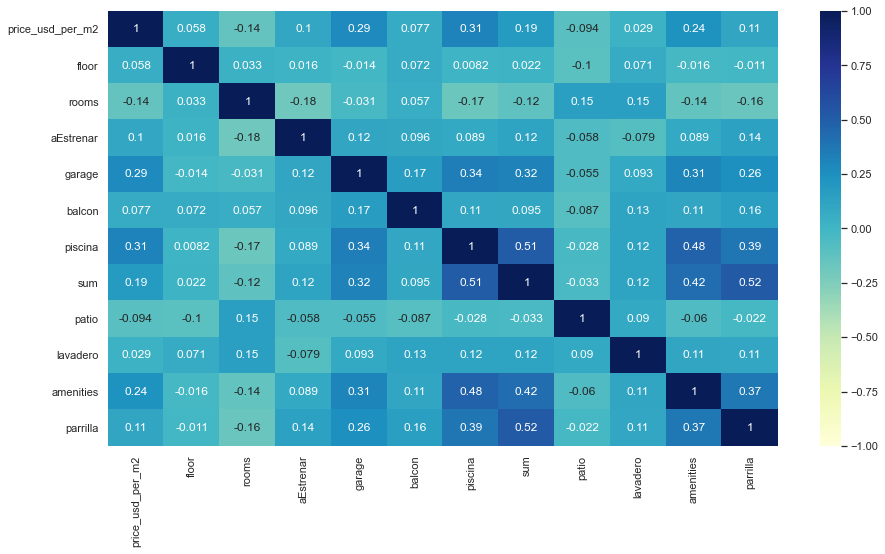

In [6]:
# visualizamos la matriz de correlación en Seaborn usando a heatmap
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data_modelo.corr(), vmin=-1, vmax=1, center=0, cmap="YlGnBu",annot=True);

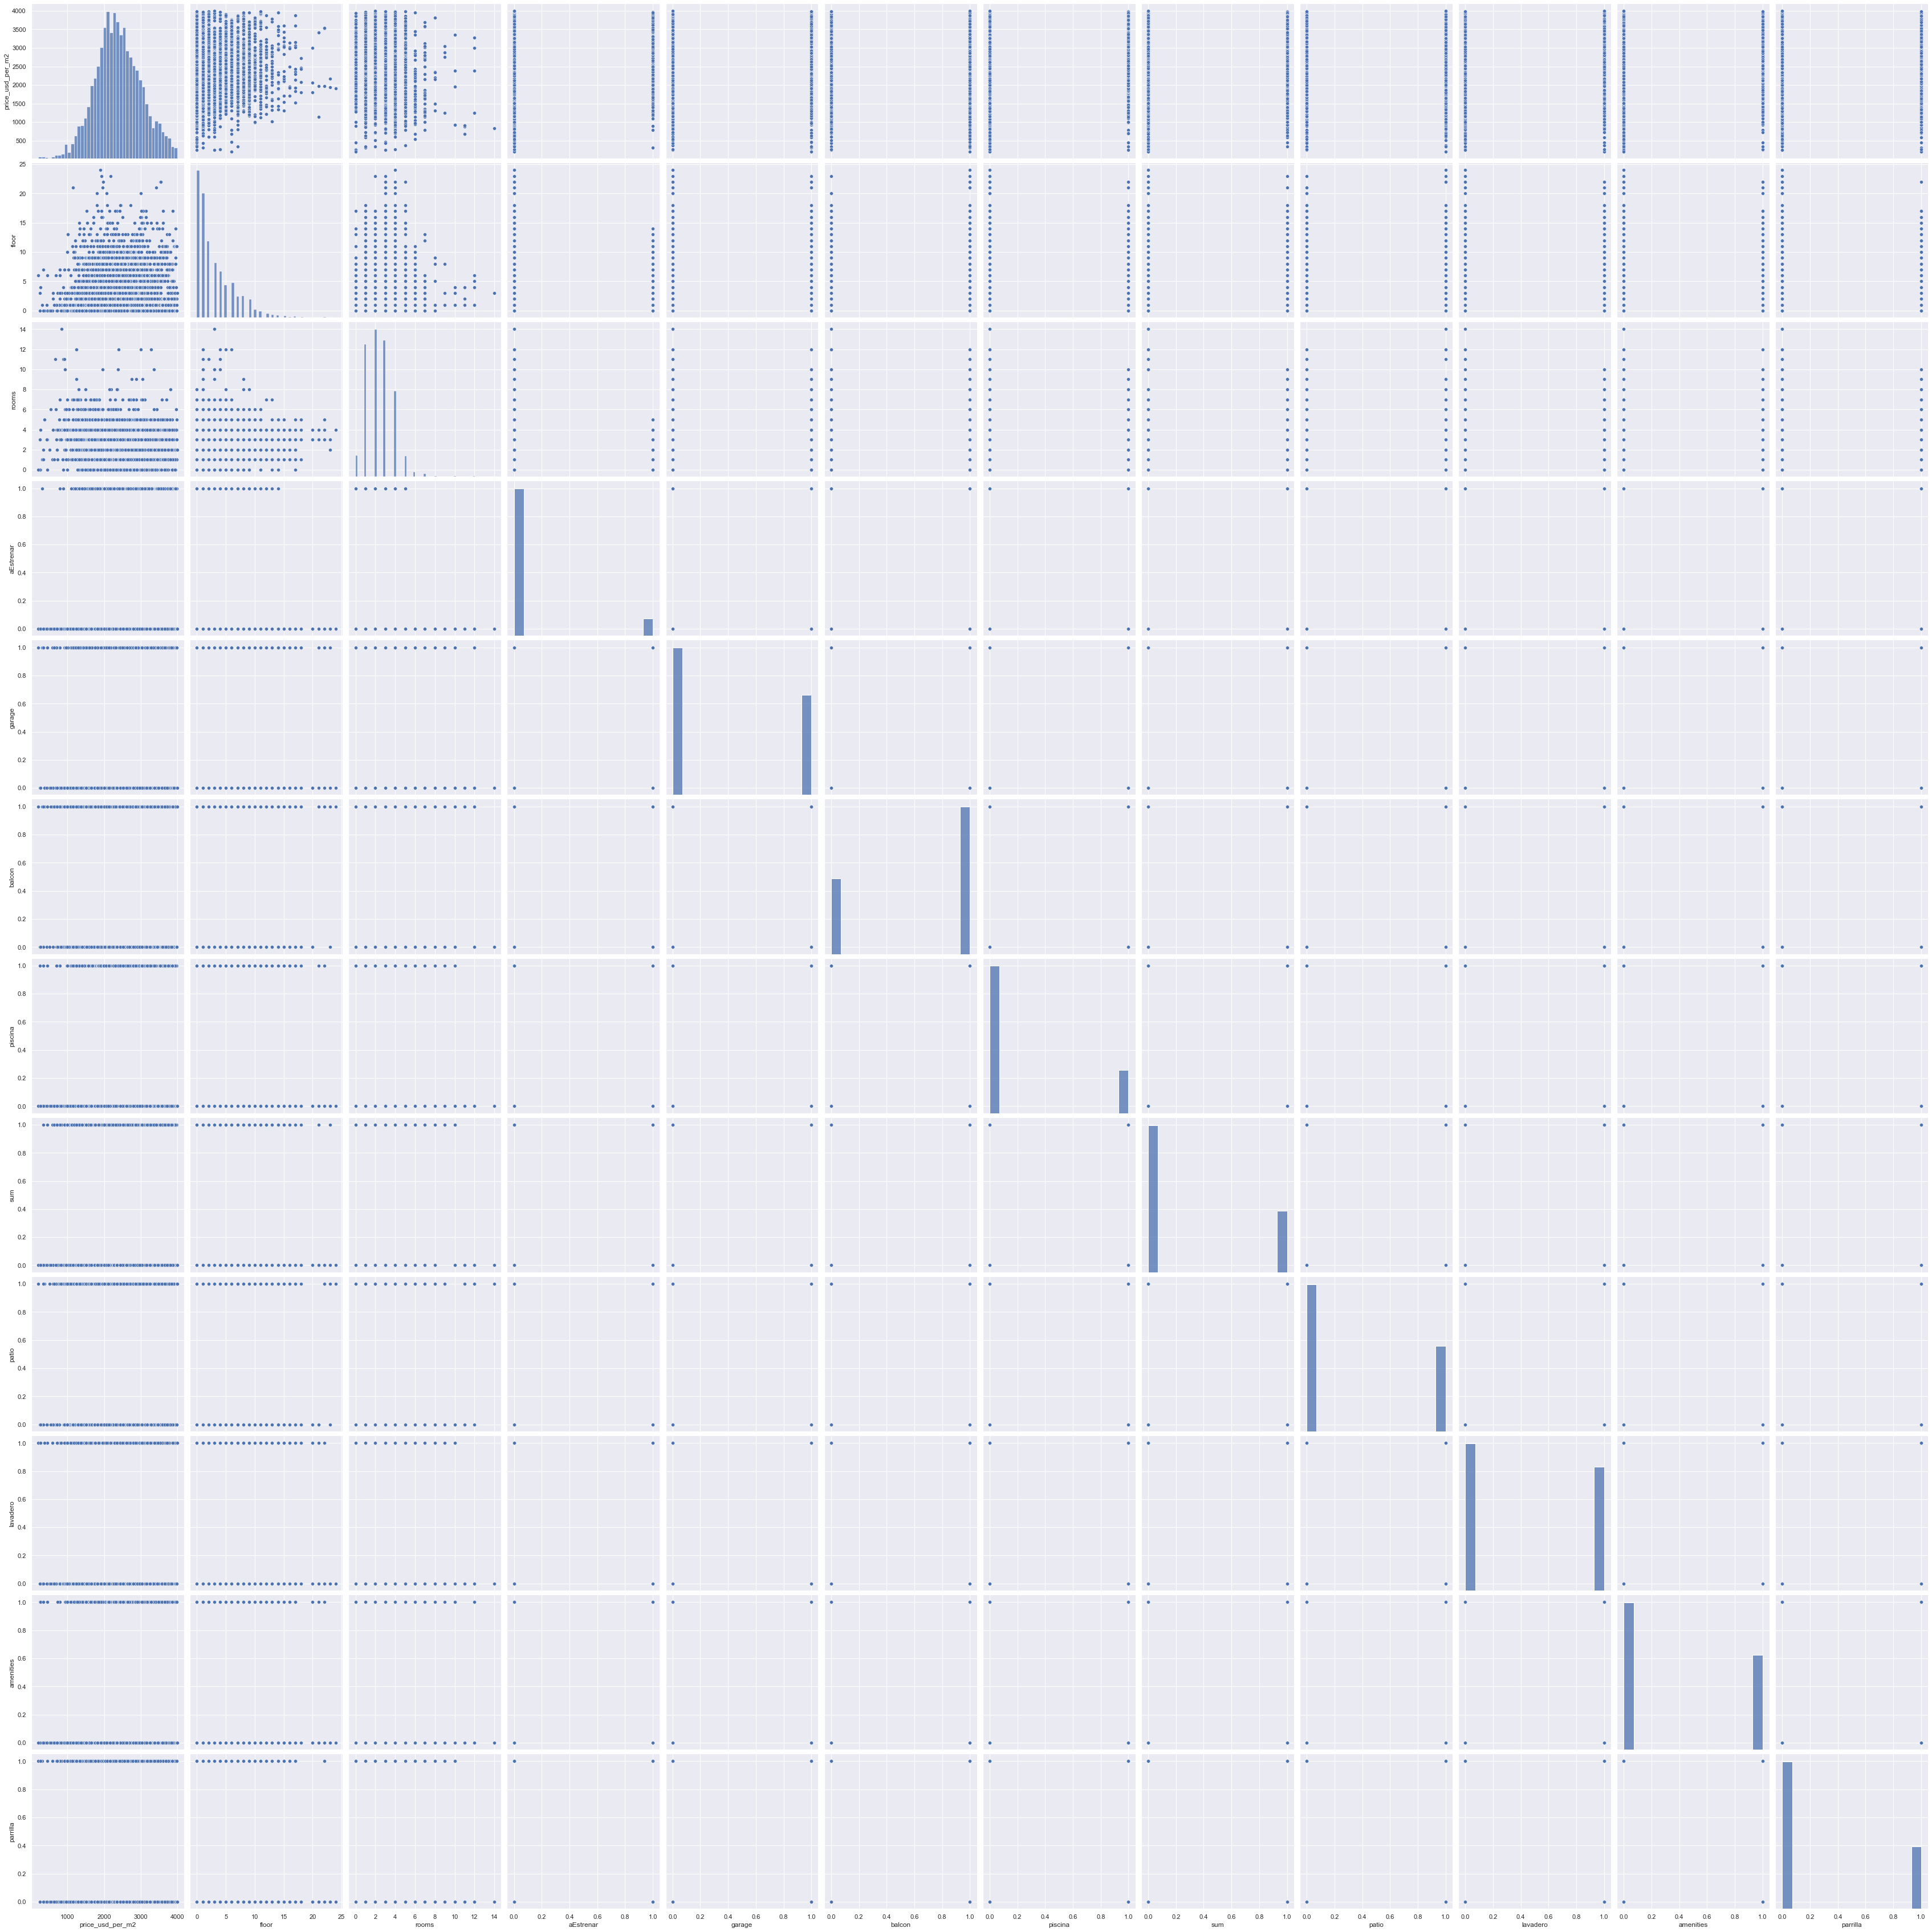

In [7]:
sns.pairplot(data=data_modelo, height=4)

In [8]:
name_model="Modelo 3" #Cambiar este nombre para cambiar los resultados de los estadísticos de cada algoritmo

## Pre-Training
### Manejo variables categóricas
Modificar las variables que deban ser dumificadas

In [9]:
#Creo dummies
#Convierto floor a object
data_modelo['floor'] = data_modelo['floor'].astype(np.object)
data_dummies=pd.get_dummies(data_modelo[['ptype','floor','place','disposicion']], drop_first = True)
data_dummies

ptype_apartment  ptype_house  floor_1.0  floor_2.0  floor_3.0  \
0                   1            0          0          0          1   
1                   1            0          0          1          0   
2                   1            0          1          0          0   
3                   1            0          1          0          0   
4                   1            0          0          0          0   
...               ...          ...        ...        ...        ...   
6397                1            0          0          1          0   
6398                1            0          0          0          0   
6399                1            0          1          0          0   
6400                1            0          1          0          0   
6401                1            0          1          0          0   

      floor_4.0  floor_5.0  floor_6.0  floor_7.0  floor_8.0  ...  \
0             0          0          0          0          0  ...   
1             0          0          0          0          0  ...   
2             0          0          0          0          0  ...   
3             0          0          0          0          0  ...   
4             0          0          0          0          0  ...   
...         ...        ...        ...        ...        ...  ...   
6397          0          0          0          0          0  ...   
6398          1          0          0          0          0  ...   
6399          0          0          0          0          0  ...   
6400          0          0          0          0          0  ...   
6401          0          0          0          0          0  ...   

      place_Villa Ortuzar  place_Villa Pueyrredón  place_Villa Real  \
0                       0                       0                 0   
1                       0                       0                 0   
2                       0                       0                 0   
3                       0                       0                 0   
4                       0                       0                 0   
...                   ...                     ...               ...   
6397                    0                       0                 0   
6398                    0                       0                 0   
6399                    0                       0                 0   
6400                    0                       0                 0   
6401                    0                       0                 0   

      place_Villa Riachuelo  place_Villa Santa Rita  place_Villa Soldati  \
0                         0                       0                    0   
1                         0                       0                    0   
2                         0                       0                    0   
3                         0                       0                    0   
4                         0                       0                    0   
...                     ...                     ...                  ...   
6397                      0                       0                    0   
6398                      0                       0                    0   
6399                      0                       0                    0   
6400                      0                       0                    0   
6401                      0                       0                    0   

      place_Villa Urquiza  place_Villa del Parque  disposicion_frente  \
0                       0                       0                   0   
1                       0                       0                   1   
2                       0                       0                   1   
3                       0                       0                   0   
4                       0                       0                   1   
...                   ...                     ...                 ...   
6397                    0                       0          

In [10]:
#Concateno las columnas que están por fuera del dummie
columnas=['price_usd_per_m2','rooms','aEstrenar','garage','balcon','piscina','sum','patio','lavadero','amenities','parrilla']
data_modelo = pd.concat([data[columnas],data_dummies], axis = 1)
data_modelo = data_modelo.reset_index(drop=True)
data_modelo.head(3)

price_usd_per_m2  rooms  aEstrenar  garage  balcon  piscina  sum  patio  \
0       1309.090909    2.0          0       0       0        0    0      0   
1       1812.500000    4.0          0       0       1        0    0      0   
2       1702.127660    5.0          0       1       1        0    0      1   

   lavadero  amenities  ...  place_Villa Ortuzar  place_Villa Pueyrredón  \
0         1          0  ...                    0                       0   
1         0          0  ...                    0                       0   
2         0          1  ...                    0                       0   

   place_Villa Real  place_Villa Riachuelo  place_Villa Santa Rita  \
0                 0                      0                       0   
1                 0                      0                       0   
2                 0                      0                       0   

   place_Villa Soldati  place_Villa Urquiza  place_Villa del Parque  \
0                    0                    0                       0   
1                    0                    0                       0   
2                    0                    0                       0   

   disposicion_frente  disposicion_lateral  
0                   0                    1  
1                   1                    0  
2                   1                    0  

[3 rows x 85 columns]

## Algoritmos

In [11]:
#Genero mi variable X
X=data_modelo.drop(['price_usd_per_m2'],axis=1)

#Genero la variable y
y = data_modelo[y_columnas].squeeze()

#Creamos las muestras
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10,shuffle=True)

### Linear Regression

In [12]:
#Entrenamos modelo LR
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
#Predecimos
lr_prediction = model_lr.predict(X_test)
lr_prediction_train = model_lr.predict(X_train)

intercept_lr = model_lr.intercept_
coeff_lr = model_lr.coef_
r2_test_lr = model_lr.score(X_test, y_test)
r2_train_lr = model_lr.score(X_train, y_train)
n = len(y_test)
p = np.count_nonzero(coeff_lr)
r2_adj_test_lr = 1-((1-r2_test_lr)*((len(y_test)-1)/(len(y_test)-p-1)))
r2_adj_train_lr = 1-((1-r2_train_lr)*((len(y_train)-1)/(len(y_train)-p-1)))
mse_test_lr = mean_squared_error(y_test, lr_prediction)
mse_train_lr = mean_squared_error(y_train, lr_prediction_train)
mae_test_lr = mean_absolute_error(y_test, lr_prediction)
mae_train_lr = mean_absolute_error(y_train, lr_prediction_train)
rmse_test_lr = np.sqrt(mse_test_lr)
rmse_train_lr = np.sqrt(mse_train_lr)

#Valores estadísticos MSE Test, MSE Train, MAE Test, MAE Train, RMSE Test, RMSE Train, R2 Test, R2 Train, R2 Adj Test, R2 Adj Train
stats_lr=[mse_test_lr, mse_train_lr,
            mae_test_lr, mae_train_lr, 
            rmse_test_lr,rmse_train_lr,
            r2_test_lr,r2_train_lr,
            r2_adj_test_lr,r2_adj_train_lr
         ]

stats_dataframe_lr=pd.DataFrame({name_model+' LR':stats_lr},index=['MSE Test', 'MSE Train', 'MAE Test', 'MAE Train', 'RMSE Test', 'RMSE Train', 'R2 Test','R2 Train', 'R2 Adj Test','R2 Adj Train'])
stats_dataframe_lr

Modelo 3 LR
MSE Test      209219.839228
MSE Train     208306.490937
MAE Test         347.467862
MAE Train        347.826348
RMSE Test        457.405552
RMSE Train       456.406059
R2 Test            0.430927
R2 Train           0.472217
R2 Adj Test        0.404891
R2 Adj Train       0.462132

In [13]:
print("Intercept:", intercept_lr)
print("Coeficientes:")
print(print(pd.Series(coeff_lr, index=X.columns)))

Intercept: 1991.4950320629277
Coeficientes:
rooms                     -49.512059
aEstrenar                 111.882176
garage                    194.469098
balcon                      5.755399
piscina                   233.559859
                             ...    
place_Villa Soldati      -900.045646
place_Villa Urquiza       426.013060
place_Villa del Parque      1.812416
disposicion_frente         24.361940
disposicion_lateral        92.129383
Length: 84, dtype: float64
None


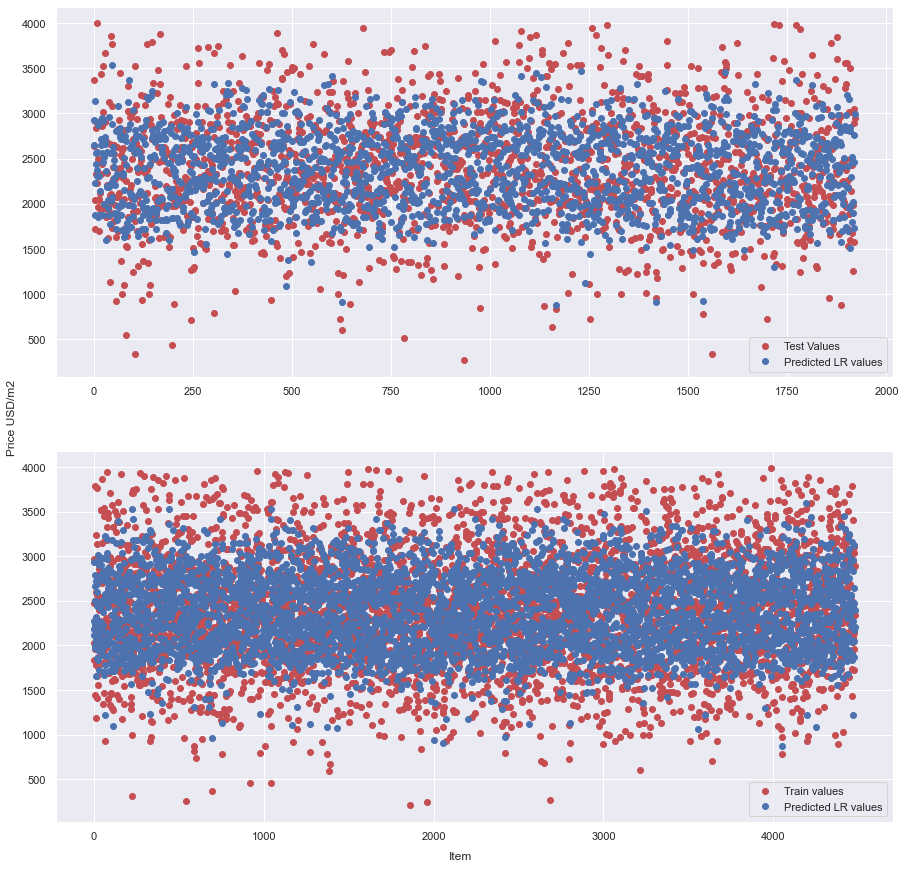

In [14]:
#Gráfico de los valores vs los predecidos
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].plot([i for i in range(len(y_test))],y_test, 'ro', label="Test Values")
axes[0].plot([i for i in range(len(y_test))],lr_prediction, 'bo', label="Predicted LR values")
axes[0].legend()

axes[1].plot([i for i in range(len(y_train))],y_train, 'ro', label="Train values")
axes[1].plot([i for i in range(len(y_train))],lr_prediction_train, 'bo', label="Predicted LR values")
axes[1].legend()

fig.text(0.5, 0.09, 'Item', ha='center')
fig.text(0.08, 0.5, 'Price USD/m2', va='center', rotation='vertical')
plt.show()

In [15]:
eje_X=range(1,len(y_test)+1)
plt.plot(eje_X, sorted(y_test), color='blue', label='Reales Test')
plt.plot(eje_X, sorted(lr_prediction), color='green', label='Estimados Test LR')
plt.legend()
plt.title('Valores estimados vs valores reales')
plt.xlabel('Index')
plt.ylabel('USD Price/m2')
plt.show()

In [16]:
#Qué tan alejados están los valores del error cuadrático medio MSE TEST
err_cuad_test_lr=pow(y_test - lr_prediction,2)
plt.scatter(y_test,err_cuad_test_lr, label='Error cuadrático')
plt.plot(y_test,np.repeat(mse_test_lr,len(err_cuad_test_lr)), label='MSE Test LR', color='green')
plt.legend()
plt.xlabel('USD Price/m2')
plt.ylabel('Error cuadrático')
plt.show()

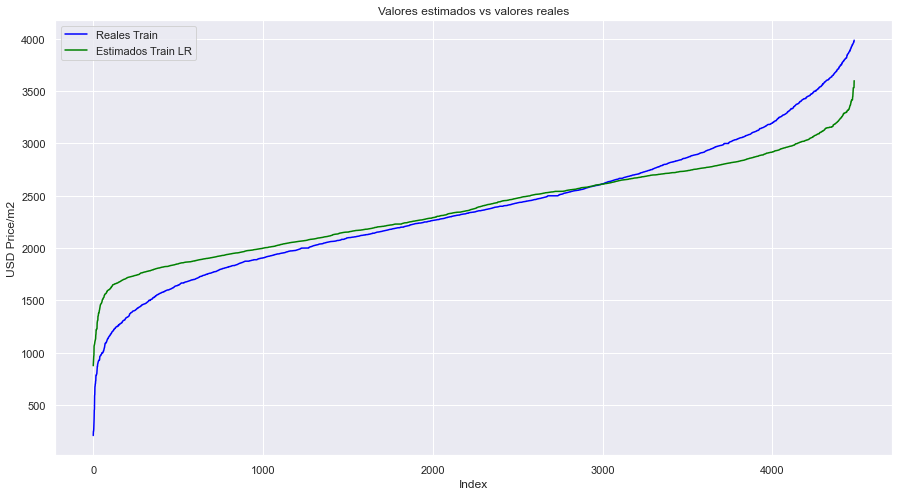

In [17]:
eje_X=range(1,len(y_train)+1)
plt.plot(eje_X, sorted(y_train), color='blue', label='Reales Train')
plt.plot(eje_X, sorted(lr_prediction_train), color='green', label='Estimados Train LR')
plt.legend()
plt.title('Valores estimados vs valores reales')
plt.xlabel('Index')
plt.ylabel('USD Price/m2')
plt.show()

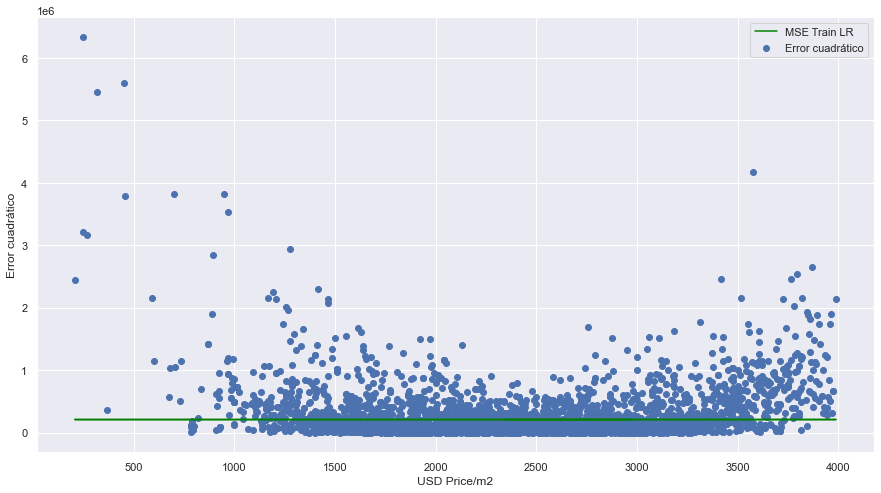

In [18]:
#Qué tan alejados están los valores del error cuadrático medio MSE TRAIN
err_cuad_train_lr=pow(y_train - lr_prediction_train,2)
plt.scatter(y_train,err_cuad_train_lr, label='Error cuadrático')
plt.plot(y_train,np.repeat(mse_train_lr,len(err_cuad_train_lr)), label='MSE Train LR', color='green')
plt.legend()
plt.xlabel('USD Price/m2')
plt.ylabel('Error cuadrático')
plt.show()

Text(0.5, 1.0, 'Residuos del modelo con train')

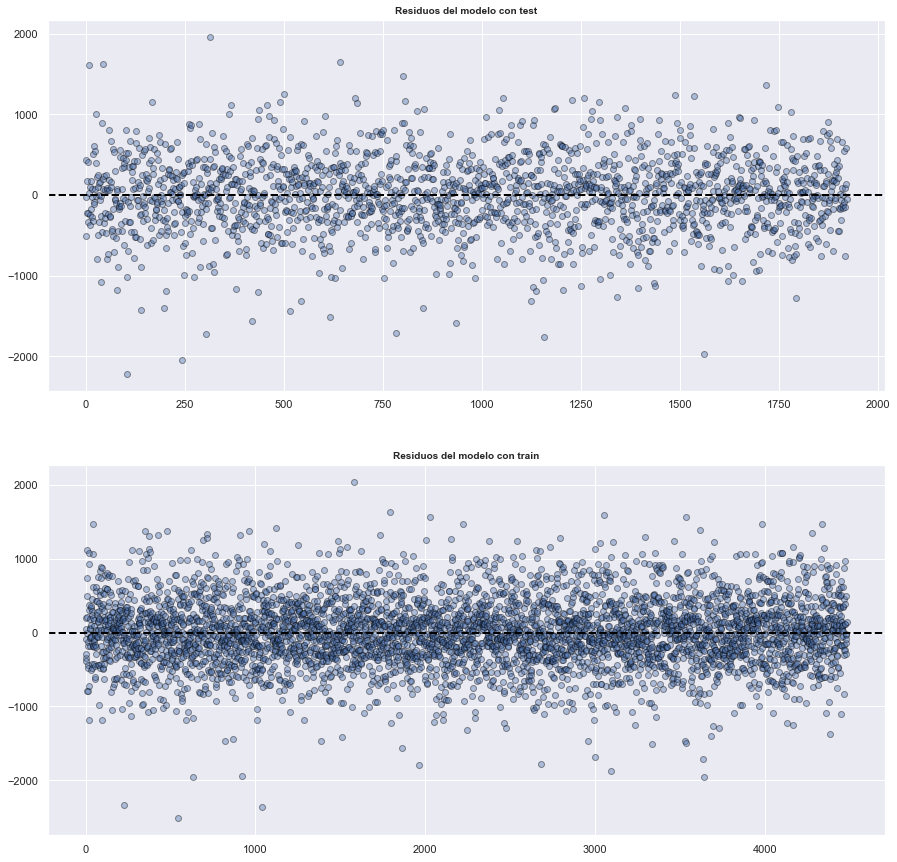

In [19]:
#Gráfico de los residuos/errores
model_residuals_test_lr = y_test - lr_prediction
model_residuals_train_lr = y_train-lr_prediction_train

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].scatter(list(range(len(y_test))), model_residuals_test_lr,
                   edgecolors=(0, 0, 0), alpha = 0.4, c="b")
axes[0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0].set_title('Residuos del modelo con test', fontsize = 10, fontweight = "bold")
axes[1].scatter(list(range(len(y_train))), model_residuals_train_lr,
                   edgecolors=(0, 0, 0), alpha = 0.4, c="b")
axes[1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[1].set_title('Residuos del modelo con train', fontsize = 10, fontweight = "bold")

In [20]:
#Histograma de residuos
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15,14))

model_residuals_test_lr.plot(kind = "hist", ax=ax2, density = True, bins = 15, color="blue");
model_residuals_test_lr.plot(kind = "kde",ax=ax2);
model_residuals_train_lr.plot(kind = "hist", ax=ax1, density = True, bins = 15, color="orange");
model_residuals_train_lr.plot(kind = "kde",ax=ax1);
ax1.set_title("Histograma de residuos para Test modelo LinearRidge");
ax2.set_title("Histograma de residuos para Train modelo LineraRidge");

### OLS

In [21]:
#Entrenamos modelo OLS
X_train_sm = sm.add_constant(X_train)
model_ols = sm.OLS(y_train, X_train_sm).fit()
#Predecimos
X_test_sm = sm.add_constant(X_test)
sm_prediction = model_ols.predict(X_test_sm)
X_train_sm = sm.add_constant(X_train)
sm_prediction_train = model_ols.predict(X_train_sm)

r2_test_ols = r2_score(y_test,sm_prediction)
r2_train_ols = r2_score(y_train,sm_prediction_train)
r2_adj_test_ols = sm.OLS(y_test, X_test_sm).fit().rsquared_adj
r2_adj_train_ols = model_ols.rsquared_adj
mse_test_ols = mean_squared_error(y_test, sm_prediction)
mse_train_ols = mean_squared_error(y_train, sm_prediction_train)
mae_test_ols = mean_absolute_error(y_test, sm_prediction)
mae_train_ols = mean_absolute_error(y_train, sm_prediction_train)
rmse_test_ols = np.sqrt(mse_test_ols)
rmse_train_ols = np.sqrt(mse_train_ols)

#Valores estadísticos MSE Test, MSE Train, MAE Test, MAE Train, RMSE Test, RMSE Train, R2 Test, R2 Train, R2 Adj Test, R2 Adj Train
stats_ols=[mse_test_ols, mse_train_ols,
            mae_test_ols, mae_train_ols, 
            rmse_test_ols,rmse_train_ols,
            r2_test_ols,r2_train_ols,
            r2_adj_test_ols,r2_adj_train_ols
         ]

stats_dataframe_ols=pd.DataFrame({name_model+' OLS':stats_ols},index=['MSE Test', 'MSE Train', 'MAE Test', 'MAE Train', 'RMSE Test', 'RMSE Train', 'R2 Test','R2 Train', 'R2 Adj Test','R2 Adj Train'])

#Summary
print(model_ols.summary())
print("")
print(stats_dataframe_ols)

                            OLS Regression Results                            
Dep. Variable:       price_usd_per_m2   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     46.82
Date:                Sat, 06 Aug 2022   Prob (F-statistic):               0.00
Time:                        19:25:39   Log-Likelihood:                -33797.
No. Observations:                4481   AIC:                         6.776e+04
Df Residuals:                    4396   BIC:                         6.831e+04
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

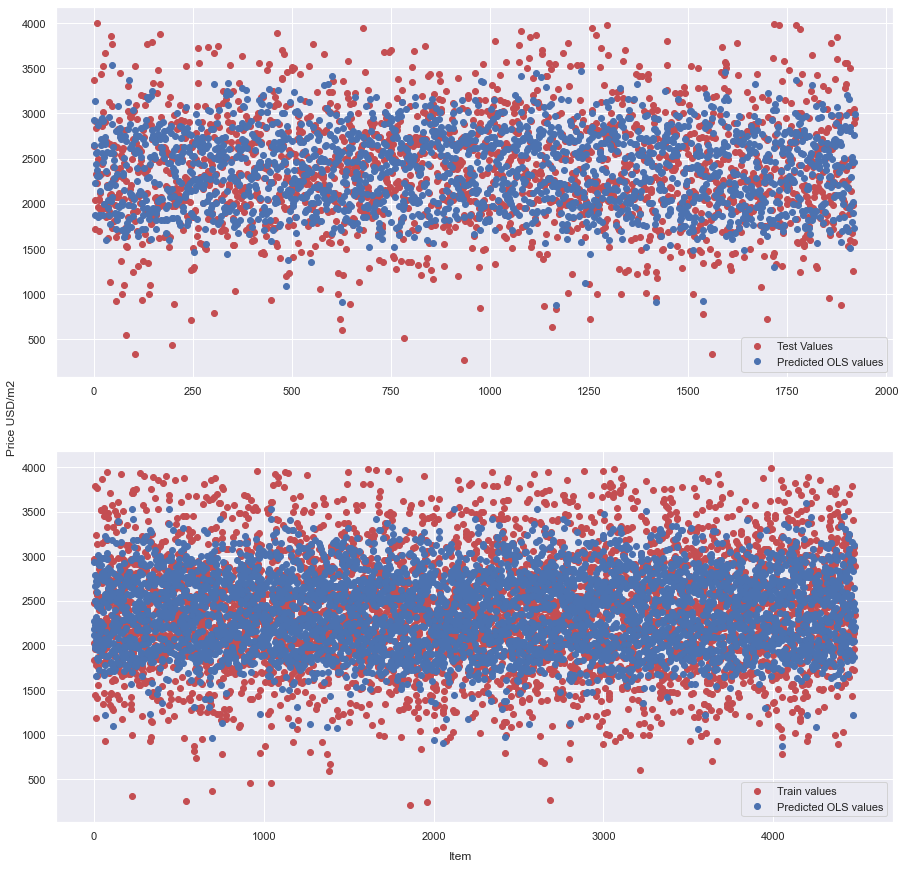

In [22]:
#Gráfico de los valores vs los predecidos
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].plot([i for i in range(len(y_test))],y_test, 'ro', label="Test Values")
axes[0].plot([i for i in range(len(y_test))],sm_prediction, 'bo', label="Predicted OLS values")
axes[0].legend()

axes[1].plot([i for i in range(len(y_train))],y_train, 'ro', label="Train values")
axes[1].plot([i for i in range(len(y_train))],sm_prediction_train, 'bo', label="Predicted OLS values")
axes[1].legend()

fig.text(0.5, 0.09, 'Item', ha='center')
fig.text(0.08, 0.5, 'Price USD/m2', va='center', rotation='vertical')
plt.show()

In [23]:
eje_X=range(1,len(y_test)+1)
plt.plot(eje_X, sorted(y_test), color='blue', label='Reales Test')
plt.plot(eje_X, sorted(sm_prediction), color='green', label='Estimados Test OLS')
plt.legend()
plt.title('Valores estimados vs valores reales')
plt.xlabel('Index')
plt.ylabel('USD Price/m2')
plt.show()

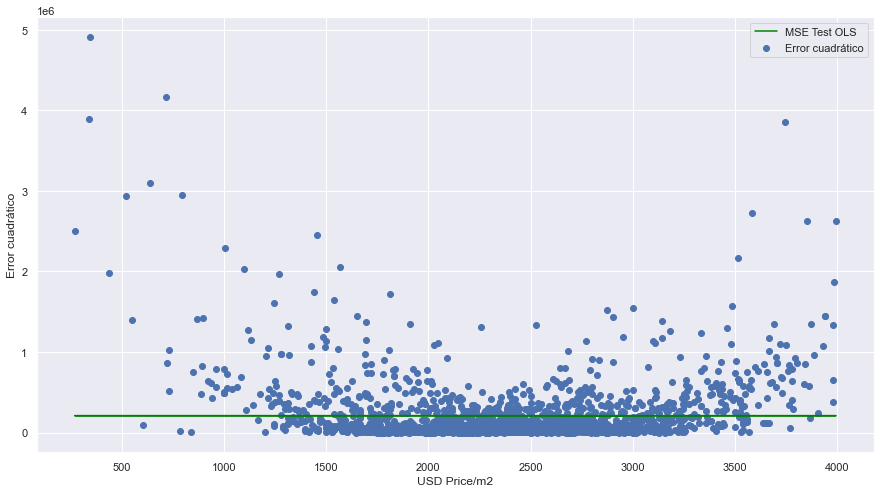

In [24]:
#Qué tan alejados están los valores del error cuadrático medio MSE TEST
err_cuad_test_ols=pow(y_test - sm_prediction,2)
plt.scatter(y_test,err_cuad_test_ols, label='Error cuadrático')
plt.plot(y_test,np.repeat(mse_test_ols,len(err_cuad_test_ols)), label='MSE Test OLS', color='green')
plt.legend()
plt.xlabel('USD Price/m2')
plt.ylabel('Error cuadrático')
plt.show()

In [25]:
eje_X=range(1,len(y_train)+1)
plt.plot(eje_X, sorted(y_train), color='blue', label='Reales Train')
plt.plot(eje_X, sorted(sm_prediction_train), color='green', label='Estimados Train OLS')
plt.legend()
plt.title('Valores estimados vs valores reales')
plt.xlabel('Index')
plt.ylabel('USD Price/m2')
plt.show()

In [26]:
#Qué tan alejados están los valores del error cuadrático medio MSE TRAIN
err_cuad_train_ols=pow(y_train - sm_prediction_train,2)
plt.scatter(y_train,err_cuad_train_ols, label='Error cuadrático')
plt.plot(y_train,np.repeat(mse_train_ols,len(err_cuad_train_ols)), label='MSE Train', color='green')
plt.legend()
plt.xlabel('USD Price/m2')
plt.ylabel('Error cuadrático')
plt.show()

Text(0.5, 1.0, 'Residuos del modelo con train')

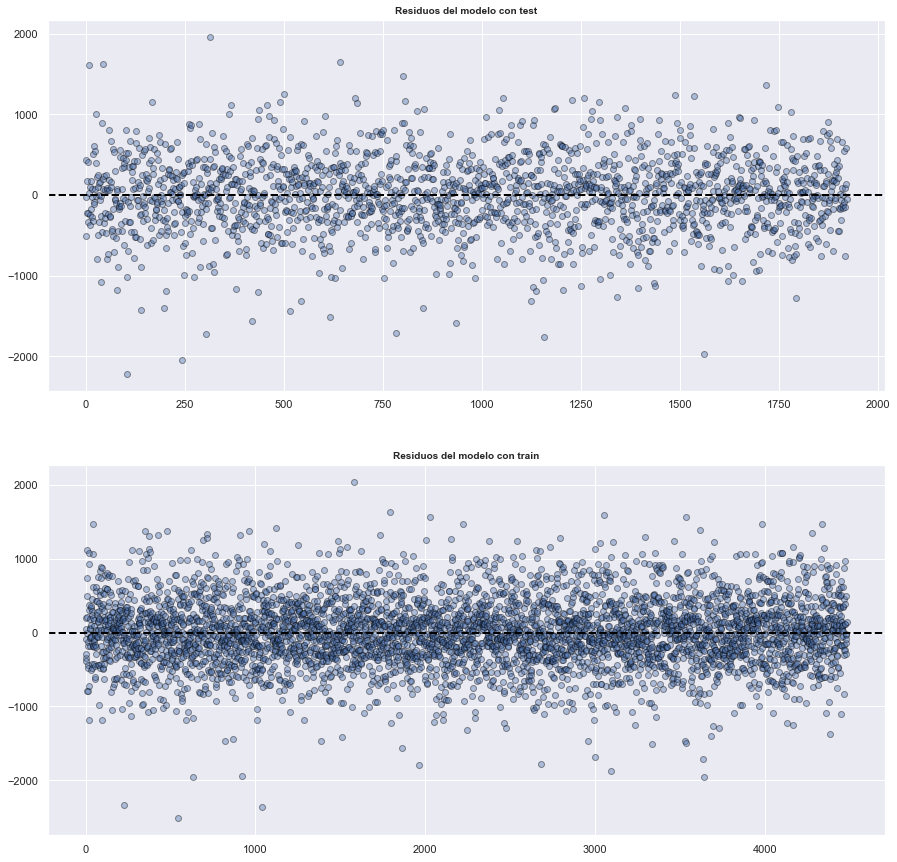

In [27]:
#Gráfico de los residuos/errores
model_residuals_test_ols = y_test - sm_prediction
model_residuals_train_ols = y_train - sm_prediction_train

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].scatter(list(range(len(y_test))), model_residuals_test_ols,
                   edgecolors=(0, 0, 0), alpha = 0.4, c="b")
axes[0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0].set_title('Residuos del modelo con test', fontsize = 10, fontweight = "bold")
axes[1].scatter(list(range(len(y_train))), model_residuals_train_ols,
                   edgecolors=(0, 0, 0), alpha = 0.4, c="b")
axes[1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[1].set_title('Residuos del modelo con train', fontsize = 10, fontweight = "bold")

In [28]:
#Histograma de residuos
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15,14))

model_residuals_test_ols.plot(kind = "hist", ax=ax2, density = True, bins = 15, color="blue");
model_residuals_test_ols.plot(kind = "kde",ax=ax2);
model_residuals_train_ols.plot(kind = "hist", ax=ax1, density = True, bins = 15, color="orange");
model_residuals_train_ols.plot(kind = "kde",ax=ax1);
ax1.set_title("Histograma de residuos para Test modelo OLS");
ax2.set_title("Histograma de residuos para Train modelo OLS");

### LASSO

In [29]:
#Análisis previo de los alpha
alphas_lasso = np.linspace(0.01,1000,100)
lasso = linear_model.Lasso(max_iter = 10000, normalize = False)
coefs = []

for a in alphas_lasso:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas_lasso, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coeficientes estandarizados')
plt.title('Coeficientes Lasso como funcion de alpha');

In [30]:
#Creamos el modelo
lassocv = linear_model.LassoCV(alphas=None,normalize=False,cv=10,random_state=10, max_iter=10000)
#Lo entrenamos
model_lasso = lassocv.fit(X_train, y_train)
#Lo probamos
lasso_prediction = model_lasso.predict(X_test)
lasso_prediction_train = model_lasso.predict(X_train)

alpha_lasso = model_lasso.alpha_
coeff_lasso = model_lasso.coef_
intercept_lasso = model_lasso.intercept_
r2_test_lasso = model_lasso.score(X_test, y_test)
r2_train_lasso = model_lasso.score(X_train, y_train)
p = np.count_nonzero(coeff_lasso)
r2_adj_test_lasso = 1-((1-r2_test_lasso)*((len(y_test)-1)/(len(y_test)-p-1)))
r2_adj_train_lasso = 1-((1-r2_train_lasso)*((len(y_train)-1)/(len(y_train)-p-1)))
mse_test_lasso = mean_squared_error(y_test, lasso_prediction)
mse_train_lasso = mean_squared_error(y_train, lasso_prediction_train)
mae_test_lasso = mean_absolute_error(y_test, lasso_prediction)
mae_train_lasso = mean_absolute_error(y_train, lasso_prediction_train)
rmse_test_lasso = np.sqrt(mse_test_lasso)
rmse_train_lasso = np.sqrt(mse_train_lasso)

#Valores estadísticos MSE Test, MSE Train, MAE Test, MAE Train, RMSE Test, RMSE Train, R2 Test, R2 Train, R2 Adj Test, R2 Adj Train
stats_lasso = [mse_test_lasso, mse_train_lasso,
                mae_test_lasso, mae_train_lasso, 
                rmse_test_lasso,rmse_train_lasso,
                r2_test_lasso,r2_train_lasso,
                r2_adj_test_lasso,r2_adj_train_lasso
                ]

stats_dataframe_lasso =pd.DataFrame({name_model+' Lasso':stats_lasso},index=['MSE Test', 'MSE Train', 'MAE Test', 'MAE Train', 'RMSE Test', 'RMSE Train', 'R2 Test','R2 Train', 'R2 Adj Test','R2 Adj Train'])
stats_dataframe_lasso

Modelo 3 Lasso
MSE Test       208482.862876
MSE Train      208926.651370
MAE Test          346.493442
MAE Train         348.932810
RMSE Test         456.599237
RMSE Train        457.084950
R2 Test             0.432932
R2 Train            0.470645
R2 Adj Test         0.411475
R2 Adj Train        0.462243

In [31]:
print("Alpha Lasso:",alpha_lasso)
print("Intercept Lasso:",intercept_lasso)
print("Coeficientes Ridge:")
print(pd.Series(coeff_lasso, index=X.columns))

Alpha Lasso: 0.17663381065771394
Intercept Lasso: 2004.1521883297874
Coeficientes Ridge:
rooms                     -48.919320
aEstrenar                 108.986631
garage                    194.680682
balcon                      7.314716
piscina                   235.677866
                             ...    
place_Villa Soldati      -637.710748
place_Villa Urquiza       414.244616
place_Villa del Parque     -0.000000
disposicion_frente         20.621617
disposicion_lateral        80.197997
Length: 84, dtype: float64


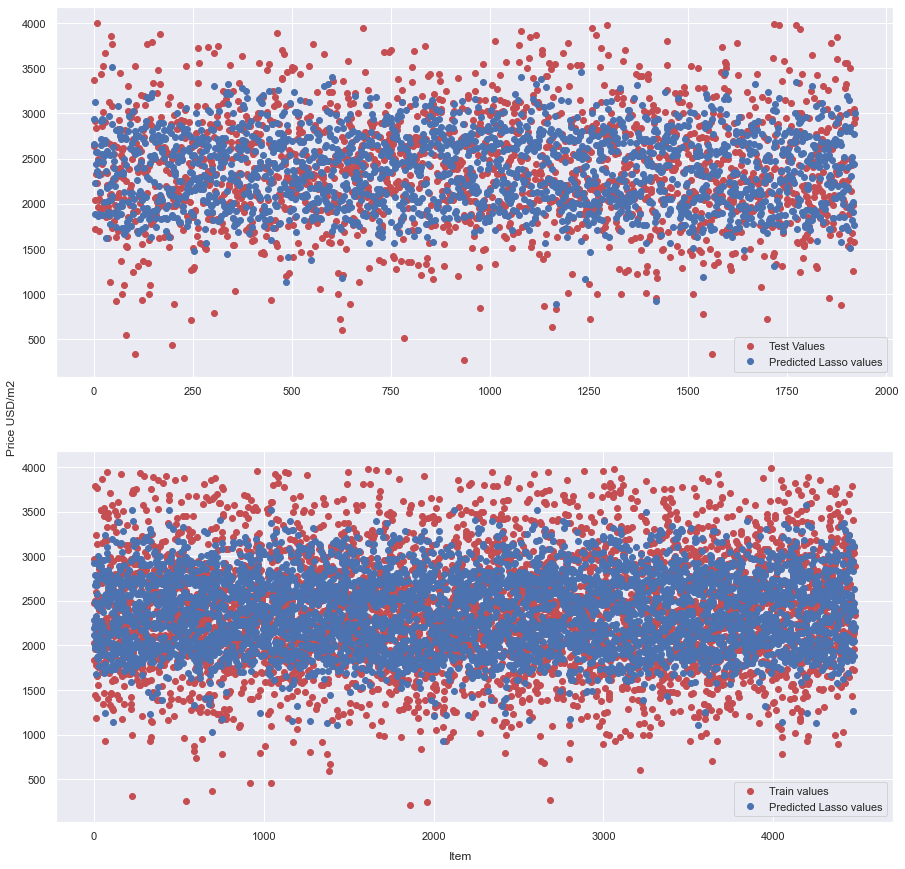

In [32]:
#Gráfico de los valores vs los predecidos
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].plot([i for i in range(len(y_test))],y_test, 'ro', label="Test Values")
axes[0].plot([i for i in range(len(y_test))],lasso_prediction, 'bo', label="Predicted Lasso values")
axes[0].legend()

axes[1].plot([i for i in range(len(y_train))],y_train, 'ro', label="Train values")
axes[1].plot([i for i in range(len(y_train))],lasso_prediction_train, 'bo', label="Predicted Lasso values")
axes[1].legend()

fig.text(0.5, 0.09, 'Item', ha='center')
fig.text(0.08, 0.5, 'Price USD/m2', va='center', rotation='vertical')
plt.show()

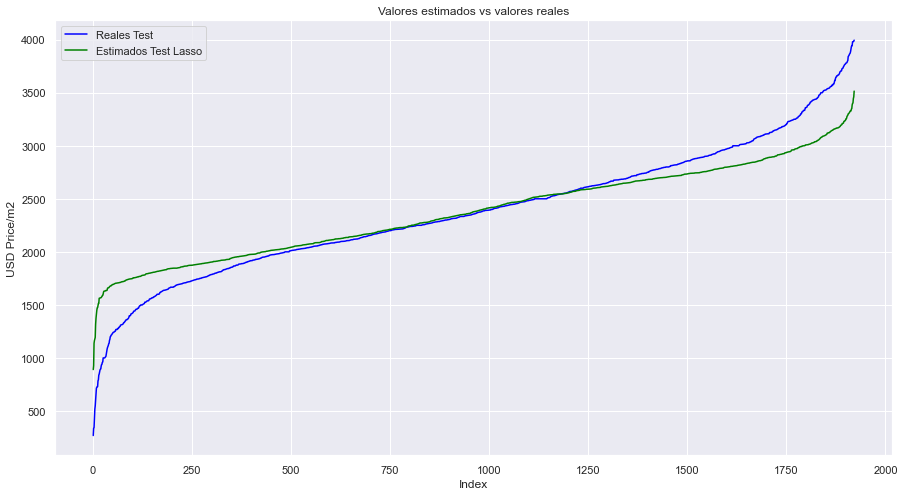

In [33]:
eje_X=range(1,len(y_test)+1)
plt.plot(eje_X, sorted(y_test), color='blue', label='Reales Test')
plt.plot(eje_X, sorted(lasso_prediction), color='green', label='Estimados Test Lasso')
plt.legend()
plt.title('Valores estimados vs valores reales')
plt.xlabel('Index')
plt.ylabel('USD Price/m2')
plt.show()

In [34]:
#Qué tan alejados están los valores del error cuadrático medio MSE TEST
err_cuad_test_lasso=pow(y_test - lasso_prediction,2)
plt.scatter(y_test,err_cuad_test_lasso, label='Error cuadrático')
plt.plot(y_test,np.repeat(mse_test_lasso,len(err_cuad_test_lasso)), label='MSE Test Lasso', color='green')
plt.legend()
plt.xlabel('USD Price/m2')
plt.ylabel('Error cuadrático')
plt.show()

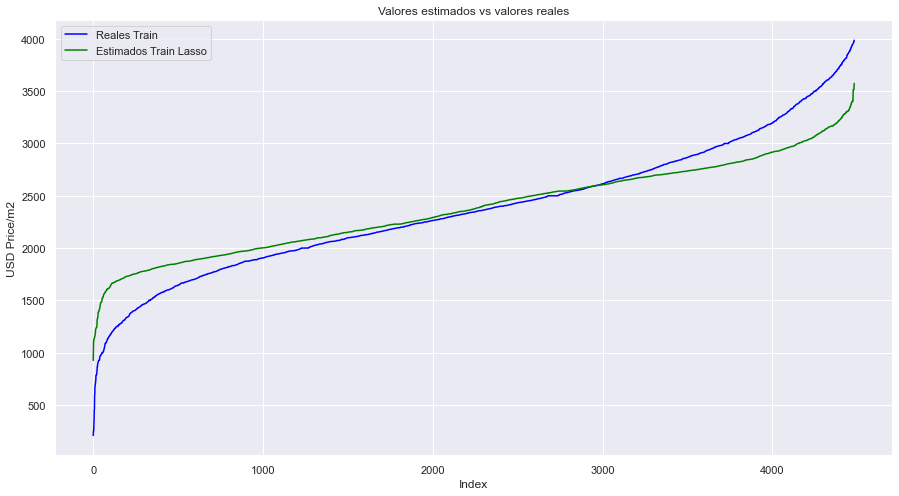

In [35]:
eje_X=range(1,len(y_train)+1)
plt.plot(eje_X, sorted(y_train), color='blue', label='Reales Train')
plt.plot(eje_X, sorted(lasso_prediction_train), color='green', label='Estimados Train Lasso')
plt.legend()
plt.title('Valores estimados vs valores reales')
plt.xlabel('Index')
plt.ylabel('USD Price/m2')
plt.show()

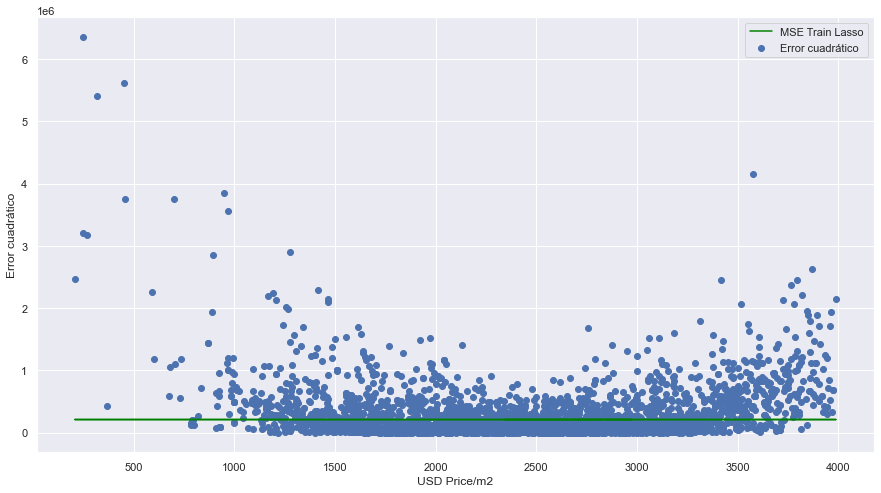

In [36]:
#Qué tan alejados están los valores del error cuadrático medio MSE TRAIN
err_cuad_train_lasso=pow(y_train - lasso_prediction_train,2)
plt.scatter(y_train,err_cuad_train_lasso, label='Error cuadrático')
plt.plot(y_train,np.repeat(mse_train_lasso,len(err_cuad_train_lasso)), label='MSE Train Lasso', color='green')
plt.legend()
plt.xlabel('USD Price/m2')
plt.ylabel('Error cuadrático')
plt.show()

Text(0.5, 1.0, 'Residuos del modelo con train')

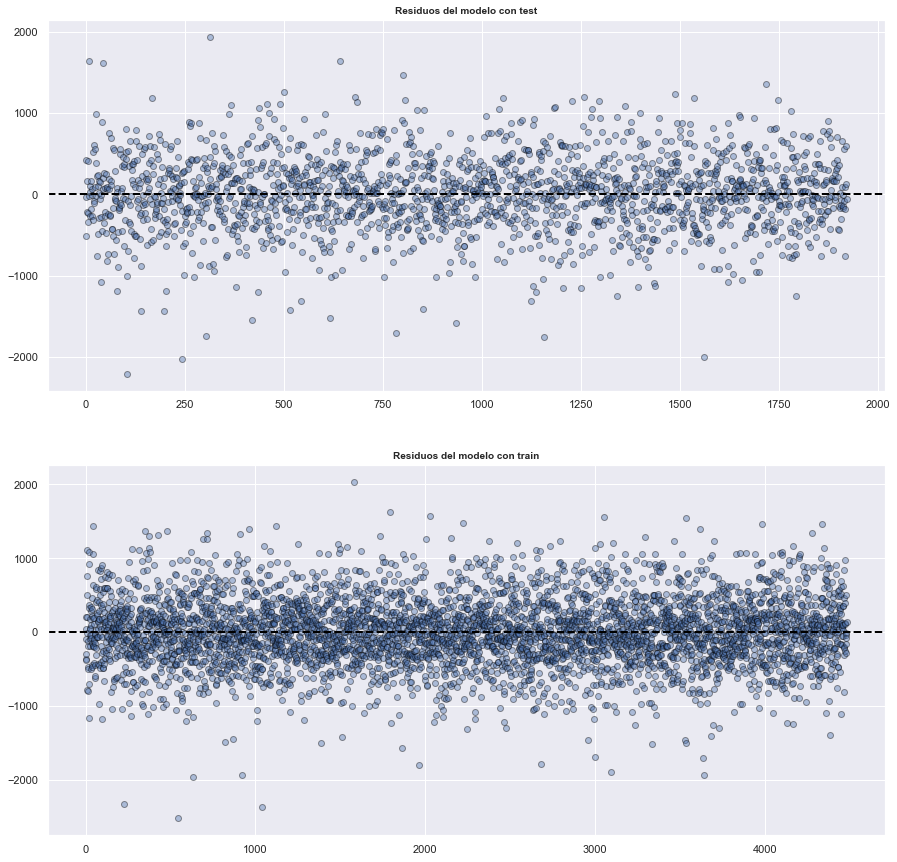

In [37]:
#Gráfico de los residuos/errores
model_residuals_test_lasso = y_test - lasso_prediction
model_residuals_train_lasso = y_train-lasso_prediction_train

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].scatter(list(range(len(y_test))), model_residuals_test_lasso,
                   edgecolors=(0, 0, 0), alpha = 0.4, c="b")
axes[0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0].set_title('Residuos del modelo con test', fontsize = 10, fontweight = "bold")
axes[1].scatter(list(range(len(y_train))), model_residuals_train_lasso,
                   edgecolors=(0, 0, 0), alpha = 0.4, c="b")
axes[1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[1].set_title('Residuos del modelo con train', fontsize = 10, fontweight = "bold")

In [38]:
#Histograma de residuos
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15,14))

model_residuals_test_lasso.plot(kind = "hist", ax=ax2, density = True, bins = 15, color="blue");
model_residuals_test_lasso.plot(kind = "kde",ax=ax2);
model_residuals_train_lasso.plot(kind = "hist", ax=ax1, density = True, bins = 15, color="orange");
model_residuals_train_lasso.plot(kind = "kde",ax=ax1);
ax1.set_title("Histograma de residuos para Test modelo Lasso");
ax2.set_title("Histograma de residuos para Train modelo Lasso");

## Ridge

In [39]:
#Análisis previo de los alpha
#alphas_ridge = np.logspace(-10, 10, 400)
alphas_ridge = np.logspace(-3, 7,400)
ridge = linear_model.Ridge(max_iter=10000)
coefs = []

for a in alphas_ridge:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

ax = plt.gca()

ax.plot(alphas_ridge, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coeficientes estandarizados')
plt.title('Coeficientes Ridge como funcion de alpha');

In [40]:
#Creamos el modelo
ridgecv = linear_model.RidgeCV(alphas=alphas_ridge,normalize=False,cv=10)
#Lo entrenamos
model_ridge = ridgecv.fit(X_train, y_train)
#Lo probamos
ridge_prediction = model_ridge.predict(X_test)
ridge_prediction_train = model_ridge.predict(X_train)

alpha_ridge = model_ridge.alpha_
coeff_ridge = model_ridge.coef_
intercept_ridge = model_ridge.intercept_
r2_test_ridge = model_ridge.score(X_test, y_test)
r2_train_ridge = model_ridge.score(X_train, y_train)
p = np.count_nonzero(coeff_ridge)
r2_adj_test_ridge = 1-((1-r2_test_ridge)*((len(y_test)-1)/(len(y_test)-p-1)))
r2_adj_train_ridge = 1-((1-r2_train_ridge)*((len(y_train)-1)/(len(y_train)-p-1)))
mse_test_ridge = mean_squared_error(y_test, ridge_prediction)
mse_train_ridge = mean_squared_error(y_train, ridge_prediction_train)
mae_test_ridge = mean_absolute_error(y_test, ridge_prediction)
mae_train_ridge = mean_absolute_error(y_train, ridge_prediction_train)
rmse_test_ridge = np.sqrt(mse_test_ridge)
rmse_train_ridge = np.sqrt(mse_train_ridge)

#Valores estadísticos MSE Test, MSE Train, MAE Test, MAE Train, RMSE Test, RMSE Train, R2 Test, R2 Train, R2 Adj Test, R2 Adj Train
stats_ridge = [mse_test_ridge, mse_train_ridge,
                mae_test_ridge, mae_train_ridge, 
                rmse_test_ridge,rmse_train_ridge,
                r2_test_ridge,r2_train_ridge,
                r2_adj_test_ridge,r2_adj_train_ridge
                ]

stats_dataframe_ridge =pd.DataFrame({name_model+' Ridge':stats_ridge},index=['MSE Test', 'MSE Train', 'MAE Test', 'MAE Train', 'RMSE Test', 'RMSE Train', 'R2 Test','R2 Train', 'R2 Adj Test','R2 Adj Train'])
stats_dataframe_ridge

Modelo 3 Ridge
MSE Test       208332.554373
MSE Train      208643.979726
MAE Test          346.395098
MAE Train         348.483347
RMSE Test         456.434611
RMSE Train        456.775634
R2 Test             0.433341
R2 Train            0.471362
R2 Adj Test         0.407415
R2 Adj Train        0.461260

In [41]:
print("Alpha Ridge:",alpha_ridge)
print("Intercept Ridge:",intercept_ridge)
print("Coeficientes Ridge:")
print(pd.Series(coeff_ridge, index=X.columns))

Alpha Ridge: 2.0336240846866724
Intercept Ridge: 2078.137050519118
Coeficientes Ridge:
rooms                     -49.385826
aEstrenar                 110.627695
garage                    195.349611
balcon                      6.591369
piscina                   234.798918
                             ...    
place_Villa Soldati      -588.300774
place_Villa Urquiza       329.405166
place_Villa del Parque    -83.651379
disposicion_frente         23.107114
disposicion_lateral        87.968306
Length: 84, dtype: float64


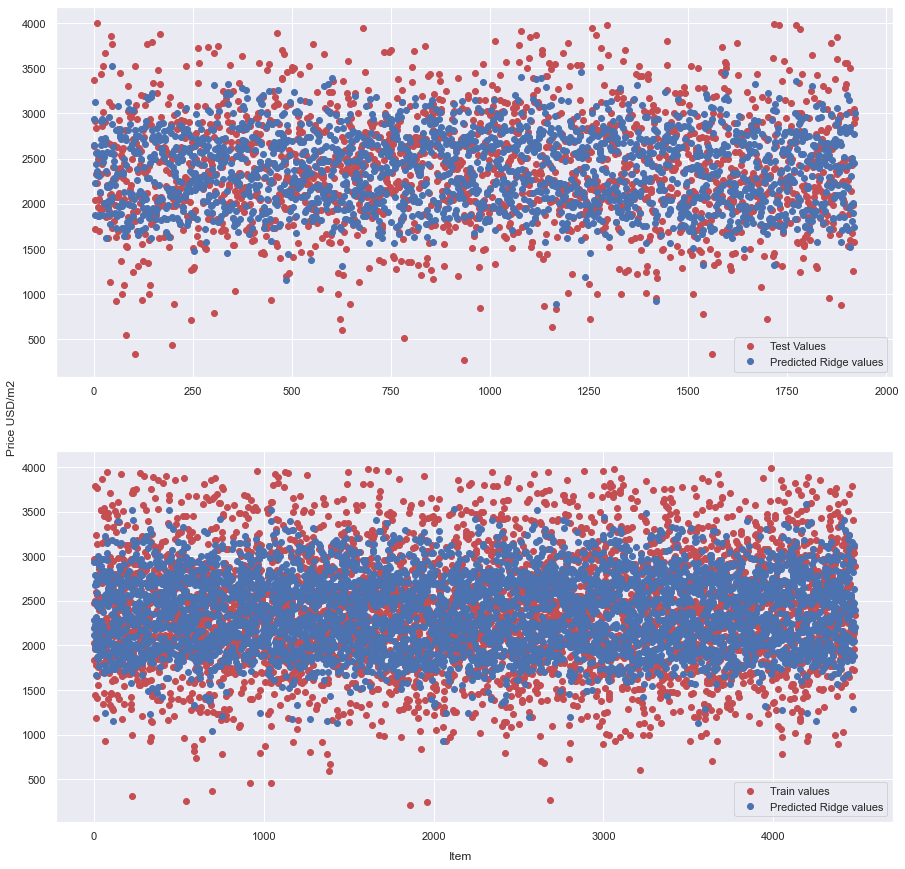

In [42]:
#Gráfico de los valores vs los predecidos
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].plot([i for i in range(len(y_test))],y_test, 'ro', label="Test Values")
axes[0].plot([i for i in range(len(y_test))],ridge_prediction, 'bo', label="Predicted Ridge values")
axes[0].legend()

axes[1].plot([i for i in range(len(y_train))],y_train, 'ro', label="Train values")
axes[1].plot([i for i in range(len(y_train))],ridge_prediction_train, 'bo', label="Predicted Ridge values")
axes[1].legend()

fig.text(0.5, 0.09, 'Item', ha='center')
fig.text(0.08, 0.5, 'Price USD/m2', va='center', rotation='vertical')
plt.show()

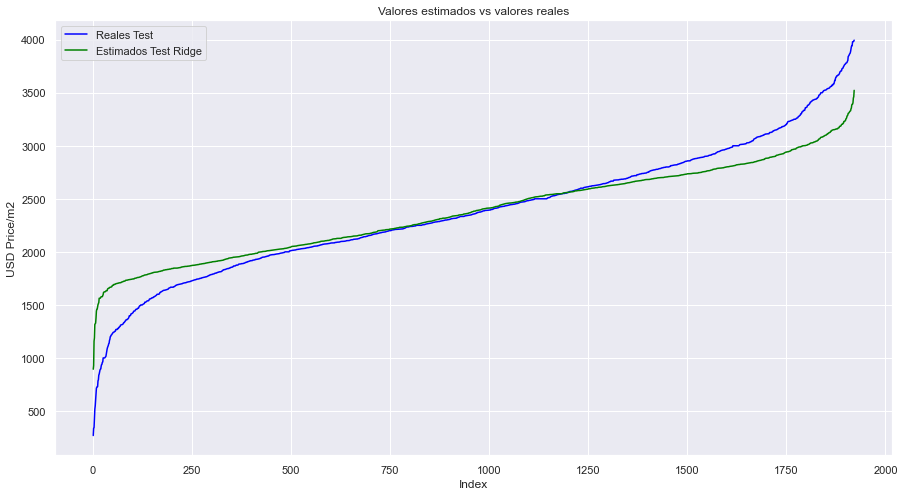

In [43]:
eje_X=range(1,len(y_test)+1)
plt.plot(eje_X, sorted(y_test), color='blue', label='Reales Test')
plt.plot(eje_X, sorted(ridge_prediction), color='green', label='Estimados Test Ridge')
plt.legend()
plt.title('Valores estimados vs valores reales')
plt.xlabel('Index')
plt.ylabel('USD Price/m2')
plt.show()

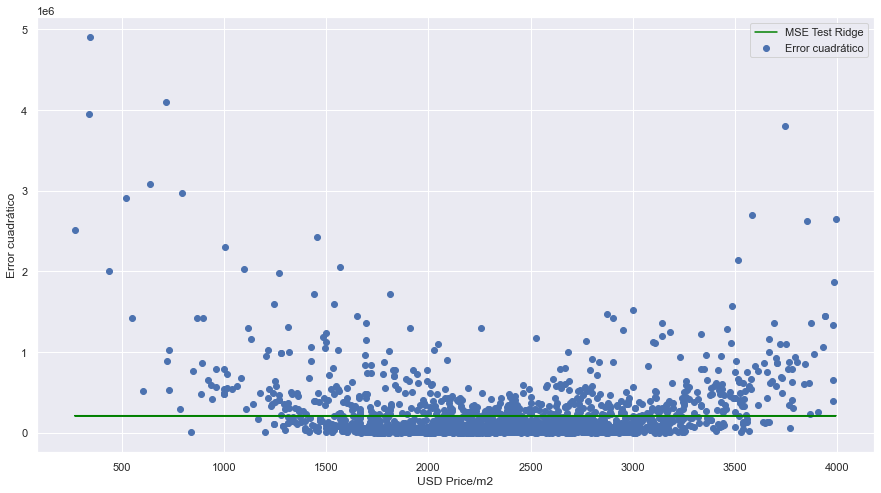

In [44]:
#Qué tan alejados están los valores del error cuadrático medio MSE TEST
err_cuad_test_ridge=pow(y_test - ridge_prediction,2)
plt.scatter(y_test,err_cuad_test_ridge, label='Error cuadrático')
plt.plot(y_test,np.repeat(mse_test_ridge,len(err_cuad_test_ridge)), label='MSE Test Ridge', color='green')
plt.legend()
plt.xlabel('USD Price/m2')
plt.ylabel('Error cuadrático')
plt.show()

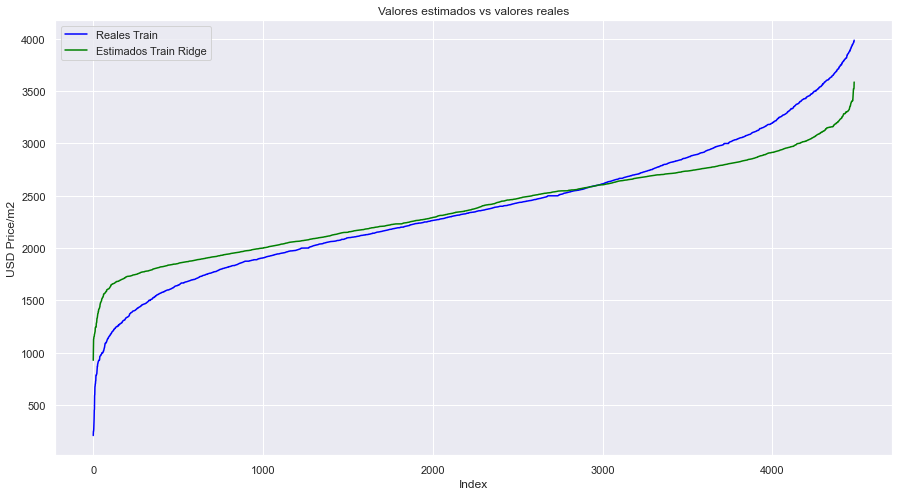

In [45]:
eje_X=range(1,len(y_train)+1)
plt.plot(eje_X, sorted(y_train), color='blue', label='Reales Train')
plt.plot(eje_X, sorted(ridge_prediction_train), color='green', label='Estimados Train Ridge')
plt.legend()
plt.title('Valores estimados vs valores reales')
plt.xlabel('Index')
plt.ylabel('USD Price/m2')
plt.show()

In [46]:
#Qué tan alejados están los valores del error cuadrático medio MSE TRAIN
err_cuad_train_ridge=pow(y_train - ridge_prediction_train,2)
plt.scatter(y_train,err_cuad_train_ridge, label='Error cuadrático')
plt.plot(y_train,np.repeat(mse_train_ridge,len(err_cuad_train_ridge)), label='MSE Train Ridge', color='green')
plt.legend()
plt.xlabel('USD Price/m2')
plt.ylabel('Error cuadrático')
plt.show()

In [47]:
#Gráfico de los residuos/errores
model_residuals_test_ridge = y_test - ridge_prediction
model_residuals_train_ridge = y_train-ridge_prediction_train

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

axes[0].scatter(list(range(len(y_test))), model_residuals_test_ridge,
                   edgecolors=(0, 0, 0), alpha = 0.4, c="b")
axes[0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0].set_title('Residuos del modelo con test', fontsize = 10, fontweight = "bold")
axes[1].scatter(list(range(len(y_train))), model_residuals_train_ridge,
                   edgecolors=(0, 0, 0), alpha = 0.4, c="b")
axes[1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[1].set_title('Residuos del modelo con train', fontsize = 10, fontweight = "bold")

Text(0.5, 1.0, 'Residuos del modelo con train')

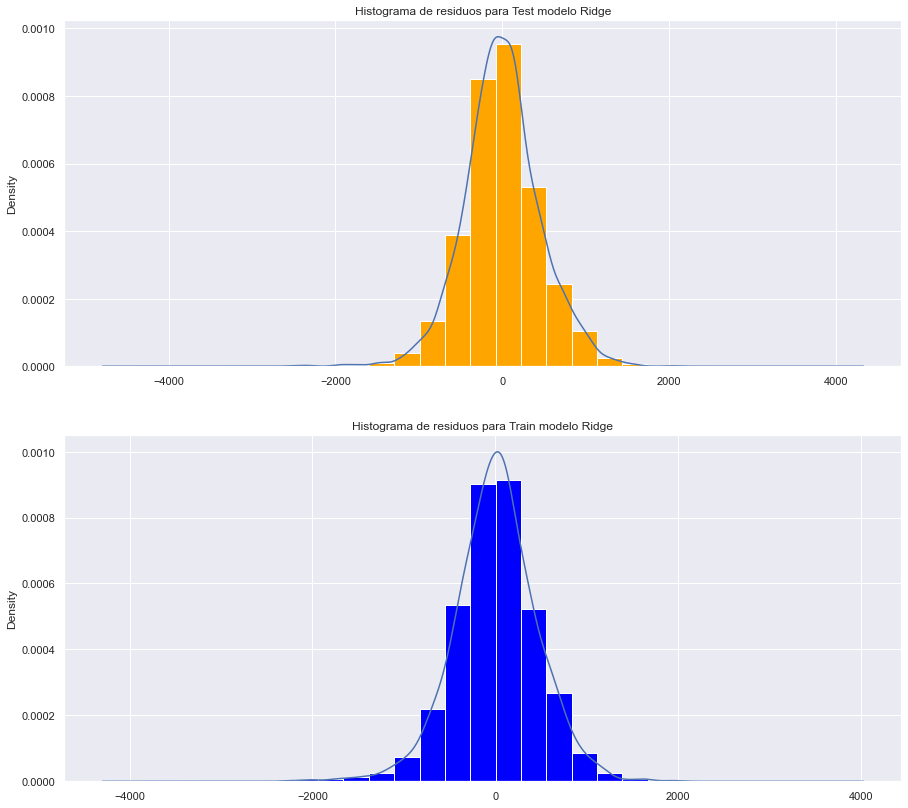

In [48]:
#Histograma de residuos
fig, (ax1,ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15,14))

model_residuals_test_ridge.plot(kind = "hist", ax=ax2, density = True, bins = 15, color="blue");
model_residuals_test_ridge.plot(kind = "kde",ax=ax2);
model_residuals_train_ridge.plot(kind = "hist", ax=ax1, density = True, bins = 15, color="orange");
model_residuals_train_ridge.plot(kind = "kde",ax=ax1);
ax1.set_title("Histograma de residuos para Test modelo Ridge");
ax2.set_title("Histograma de residuos para Train modelo Ridge");

----
## Modelos comparados entre sí

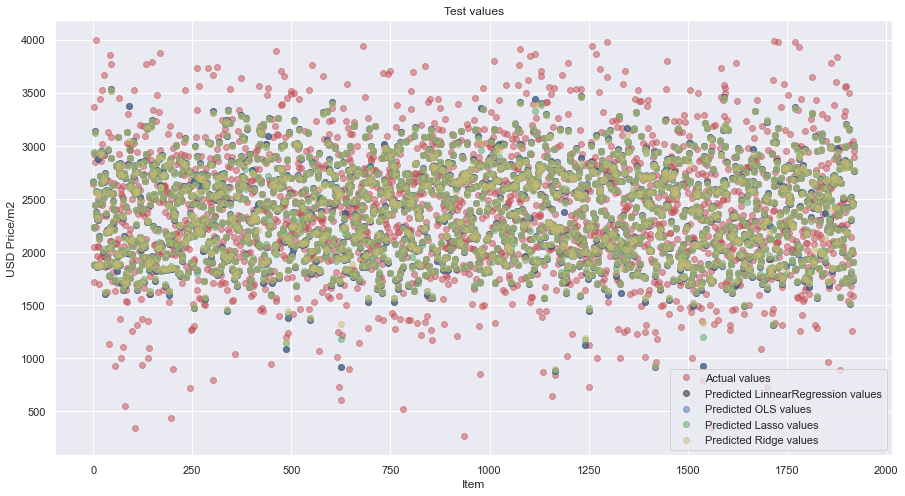

In [49]:
plt.figure(figsize=(15, 8))

plt.plot([i for i in range(len(y_test))],y_test, 'ro',label="Actual values",alpha=0.5)
plt.plot([i for i in range(len(y_test))],lr_prediction, 'ko',label="Predicted LinnearRegression values",alpha=0.5)
plt.plot([i for i in range(len(y_test))],sm_prediction, 'bo', label="Predicted OLS values",alpha=0.5)
plt.plot([i for i in range(len(y_test))],lasso_prediction, 'go', label="Predicted Lasso values",alpha=0.5)
plt.plot([i for i in range(len(y_test))],ridge_prediction, 'yo', label="Predicted Ridge values",alpha=0.5)

plt.legend()
plt.ylabel('USD Price/m2')
plt.xlabel('Item')
plt.title("Test values")
plt.show()

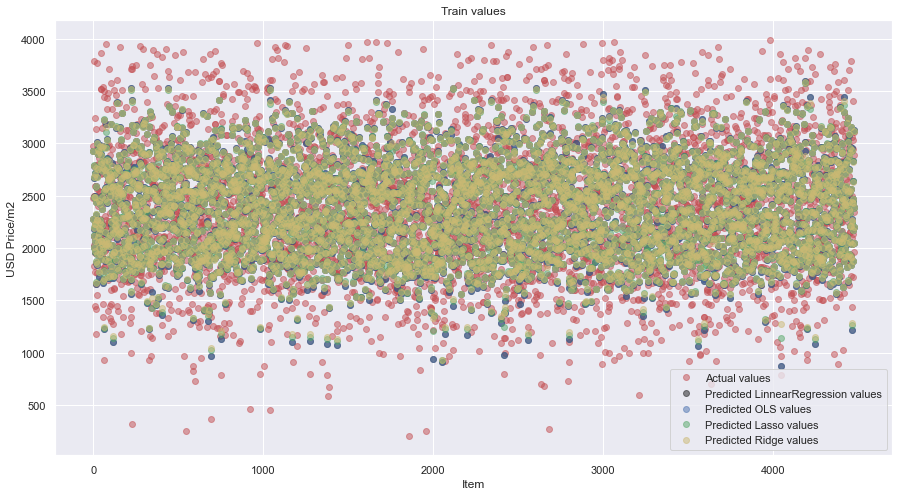

In [50]:
plt.figure(figsize=(15, 8))

plt.plot([i for i in range(len(y_train))],y_train, 'ro',label="Actual values",alpha=0.5)
plt.plot([i for i in range(len(y_train))],lr_prediction_train, 'ko',label="Predicted LinnearRegression values",alpha=0.5)
plt.plot([i for i in range(len(y_train))],sm_prediction_train, 'bo', label="Predicted OLS values",alpha=0.5)
plt.plot([i for i in range(len(y_train))],lasso_prediction_train, 'go', label="Predicted Lasso values",alpha=0.5)
plt.plot([i for i in range(len(y_train))],ridge_prediction_train, 'yo', label="Predicted Ridge values",alpha=0.5)

plt.legend()
plt.ylabel('USD Price/m2')
plt.xlabel('Item')
plt.title("Train values")
plt.show()

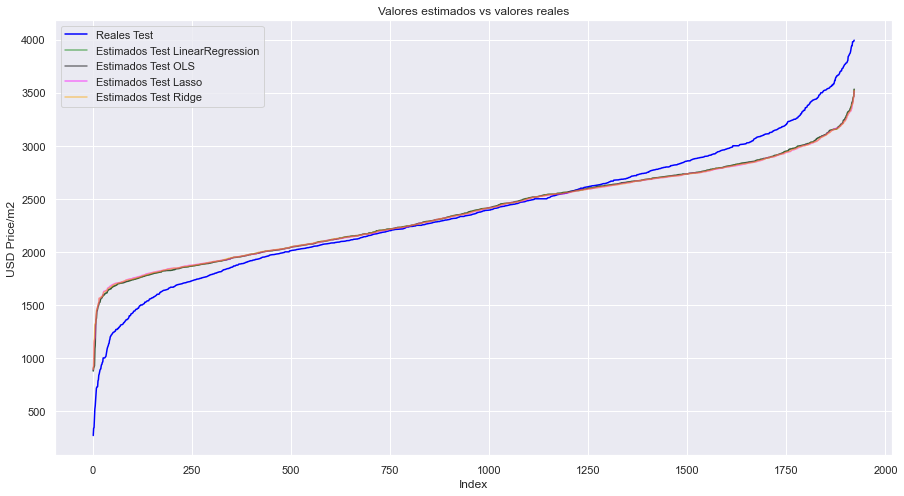

In [51]:
eje_X=range(1,len(y_test)+1)
plt.plot(eje_X, sorted(y_test), color='blue', label='Reales Test')
plt.plot(eje_X, sorted(lr_prediction), color='green', label='Estimados Test LinearRegression', alpha=0.5)
plt.plot(eje_X, sorted(sm_prediction), color='black', label='Estimados Test OLS', alpha=0.5)
plt.plot(eje_X, sorted(lasso_prediction), color='magenta', label='Estimados Test Lasso', alpha=0.5)
plt.plot(eje_X, sorted(ridge_prediction), color='orange', label='Estimados Test Ridge', alpha=0.5)
plt.legend()
plt.title('Valores estimados vs valores reales')
plt.xlabel('Index')
plt.ylabel('USD Price/m2')
plt.show()

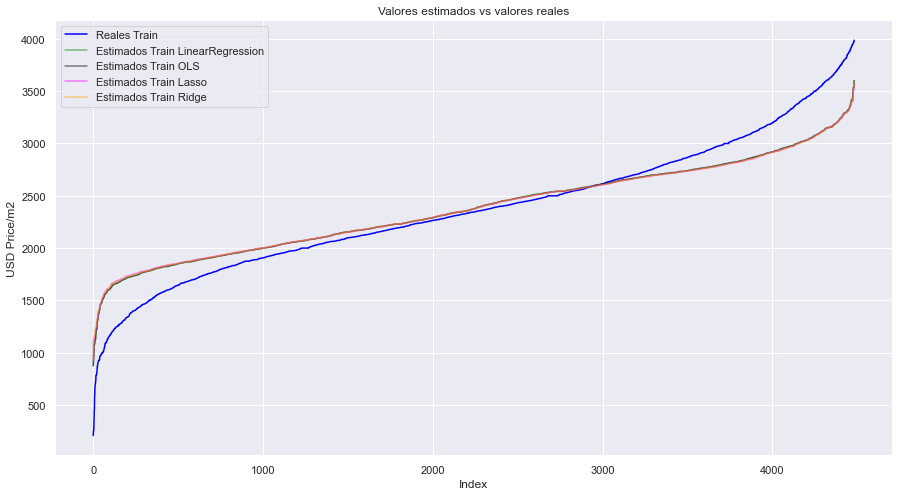

In [52]:
eje_X=range(1,len(y_train)+1)
plt.plot(eje_X, sorted(y_train), color='blue', label='Reales Train')
plt.plot(eje_X, sorted(lr_prediction_train), color='green', label='Estimados Train LinearRegression', alpha=0.5)
plt.plot(eje_X, sorted(sm_prediction_train), color='black', label='Estimados Train OLS', alpha=0.5)
plt.plot(eje_X, sorted(lasso_prediction_train), color='magenta', label='Estimados Train Lasso', alpha=0.5)
plt.plot(eje_X, sorted(ridge_prediction_train), color='orange', label='Estimados Train Ridge', alpha=0.5)
plt.legend()
plt.title('Valores estimados vs valores reales')
plt.xlabel('Index')
plt.ylabel('USD Price/m2')
plt.show()

In [53]:
# Valores estadísticos
pd.concat([stats_dataframe_lr,stats_dataframe_ols,stats_dataframe_lasso,stats_dataframe_ridge],axis=1)

Modelo 3 LR   Modelo 3 OLS  Modelo 3 Lasso  Modelo 3 Ridge
MSE Test      209219.839228  209219.839228   208482.862876   208332.554373
MSE Train     208306.490937  208306.490937   208926.651370   208643.979726
MAE Test         347.467862     347.467862      346.493442      346.395098
MAE Train        347.826348     347.826348      348.932810      348.483347
RMSE Test        457.405552     457.405552      456.599237      456.434611
RMSE Train       456.406059     456.406059      457.084950      456.775634
R2 Test            0.430927       0.430927        0.432932        0.433341
R2 Train           0.472217       0.472217        0.470645        0.471362
R2 Adj Test        0.404891       0.447172        0.411475        0.407415
R2 Adj Train       0.462132       0.462132        0.462243        0.461260

In [54]:
# Parámetros
index_series = np.insert(X.columns.to_numpy(),0,'intercept')
series_lr = pd.Series(np.insert(coeff_lr,0,model_lr.intercept_),index=index_series, name="Linear Regression")
series_ols = pd.Series(model_ols.params.to_numpy(),index=index_series, name="OLS")
series_lasso = pd.Series(np.insert(coeff_lasso,0,model_lasso.intercept_),index=index_series, name="Lasso")
series_ridge = pd.Series(np.insert(coeff_ridge,0,model_ridge.intercept_),index=index_series, name="Lasso")

pd.set_option('display.max_rows', 500)
pd.concat([series_lr,series_ols,series_lasso,series_ridge],axis=1)

Linear Regression          OLS        Lasso  \
intercept                        1991.495032  1991.495032  2004.152188   
rooms                             -49.512059   -49.512059   -48.919320   
aEstrenar                         111.882176   111.882176   108.986631   
garage                            194.469098   194.469098   194.680682   
balcon                              5.755399     5.755399     7.314716   
piscina                           233.559859   233.559859   235.677866   
sum                                23.764309    23.764309    24.262995   
patio                             -76.542768   -76.542768   -77.415482   
lavadero                          -37.472156   -37.472156   -35.495785   
amenities                         110.491234   110.491234   108.861119   
parrilla                          -31.419977   -31.419977   -31.491700   
ptype_apartment                    -2.570508    -2.570508     2.278535   
ptype_house                      -204.552907  -204.552907   -16.190870   
floor_1.0                           4.538560     4.538560    -7.797814   
floor_2.0                          84.525307    84.525307    68.998443   
floor_3.0                          76.027167    76.027167    61.039699   
floor_4.0                          44.716502    44.716502    29.301646   
floor_5.0                         166.329649   166.329649   151.939804   
floor_6.0                         145.670311   145.670311   128.500665   
floor_7.0                          66.914888    66.914888    45.392939   
floor_8.0                         139.444991   139.444991   120.362440   
floor_9.0                         -61.482956   -61.482956   -69.742334   
floor_10.0                        212.268698   212.268698   186.340878   
floor_11.0                        243.872297   243.872297   213.468451   
floor_12.0                        230.566153   230.566153   186.002168   
floor_13.0                         86.243752    86.243752    34.422673   
floor_14.0                        180.409569   180.409569    91.885679   
floor_15.0                        266.358943   266.358943   176.557744   
floor_16.0                        659.555793   659.555793   244.349757   
floor_17.0                        262.119712   262.119712   135.306498   
floor_18.0                        -65.379207   -65.379207    -0.000000   
floor_20.0                        369.221916   369.221916     0.000000   
floor_21.0                        215.016620   215.016620     0.000000   
floor_22.0                        387.482578   387.482578     0.000000   
floor_23.0                        -23.218136   -23.218136    -0.000000   
floor_24.0                        209.392398   209.392398     0.000000   
place_Almagro                     195.197582   195.197582   186.096656   
place_Balvanera                   -50.033734   -50.033734   -47.505114   
place_Barracas                    -95.205674   -95.205674   -84.718836   
place_Belgrano                    693.008717   693.008717   685.563321   
place_Boca                       -226.262570  -226.262570  -215.011996   
place_Boedo                       -58.845200   -58.845200   -43.848613   
place_Caballito                   332.858866   332.858866   331.539822   
place_Chacarita                   308.441209   308.441209   291.502417   
place_Coghlan                     417.683163   417.683163   393.001486   
place_Colegiales                  633.467583   633.467583   616.968065   
place_Constitución               -442.467967  -442.467967  -435.634319   
place_Flores                      -60.183354   -60.183354   -62.529109   
place_Floresta                   -146.129658  -146.129658  -124.632655   
place_Liniers                     -10.953581   -10.953581    -0.000000   
place_Mataderos                  -252.478670  -252.478670  -240.510345   
place_Monserrat                     8.175145     8.175145     0.000000   
place_Monte Castro                  8.209248     8.209248     0.000000   
place_Nueva Pompeya            